<a href="https://colab.research.google.com/github/Wadaken43/DeepLearning/blob/main/pra_nw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

データの準備


In [43]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
print(X.shape, y.shape)
print(X)
print(y)

(1797, 64) (1797,)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [44]:
import torch

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)


アーキテクチャ・目的関数・最適化手法の定義

In [45]:
from torch import nn, optim

model = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10),
)
model.train()
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


学習の実行

In [46]:
losses = []

for ep in range(100):
  optimizer.zero_grad()
  #yの予測値を算出
  out = model(X)

  #損失を計算
  loss = lossfun(out, y)
  loss.backward()

  #勾配を更新
  optimizer.step()

  losses.append(loss.item())
_, pred = torch.max(out, 1)
print((pred == y).sum().item()/len(y))
  

0.4273789649415693


Text(0, 0.5, 'loss')

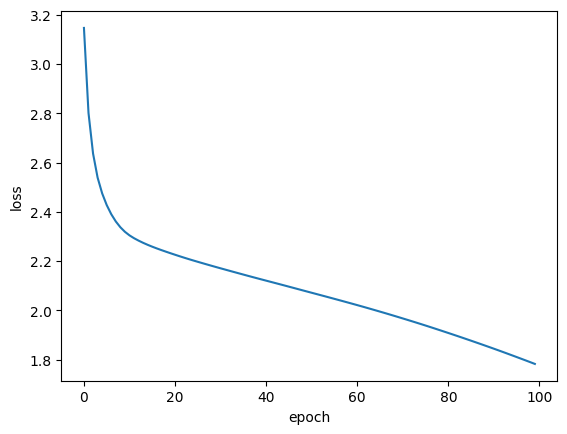

In [47]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')